In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msn
import dexplot as dxp

In [2]:
import numpy as np
from scipy.stats import spearmanr

In [3]:
train=pd.read_csv("training_set_VU_DM.csv")
#test=pd.read_csv("test_set_VU_DM.csv")


In [10]:
to_drop= ['comp1_rate',
'comp1_inv',
'comp1_rate_percent_diff',
'comp2_rate',
'comp2_inv',
'comp2_rate_percent_diff',
'comp3_rate',
'comp3_inv',
'comp3_rate_percent_diff',
'comp4_rate',
'comp4_inv',
'comp4_rate_percent_diff',
'comp5_rate',
'comp5_inv',
'comp5_rate_percent_diff',
'comp6_rate',
'comp6_inv',
'comp6_rate_percent_diff',
'comp7_rate',
'comp7_inv',
'comp7_rate_percent_diff',
'comp8_rate',
'comp8_inv',
'comp8_rate_percent_diff',
'visitor_hist_starrating', 'visitor_hist_adr_usd', 'srch_query_affinity_score','gross_bookings_usd'
]

#train['outcome'] = pd.Series(train['booking_bool']> 0, 500 + train['position'] , train['click_bool']> 0, 100 +train['position'] , 0 + train['position'] )

conditions = [
    (train['booking_bool']> 0),
    (train['click_bool']> 0)
]

choices = [500+(40 - train['position']) ,100+(40 - train['position'])]
train['outcome'] = np.select(conditions, choices, default=(40 - train['position'])

train_reduced  = train.drop(to_drop,  axis=1)#.sample(frac=0.33, replace=True, random_state=1)
#test_reduced  = test.iloc[: , :N].sample(frac=0.33, replace=True, random_state=1)

In [ ]:
# conditions = [
#     (train['booking_bool']> 0),
#     (train['click_bool']> 0)
# ]

# choices = [500+train['position'],100+train['position'], train['position']]
# train['outcome'] = np.select(conditions, choices, default=train['position'])

In [11]:
train_reduced.isnull().mean() * 100

srch_id                         0.000000
date_time                       0.000000
site_id                         0.000000
visitor_location_country_id     0.000000
prop_country_id                 0.000000
prop_id                         0.000000
prop_starrating                 0.000000
prop_review_score               0.148517
prop_brand_bool                 0.000000
prop_location_score1            0.000000
prop_location_score2           21.990151
prop_log_historical_price       0.000000
position                        0.000000
price_usd                       0.000000
promotion_flag                  0.000000
srch_destination_id             0.000000
srch_length_of_stay             0.000000
srch_booking_window             0.000000
srch_adults_count               0.000000
srch_children_count             0.000000
srch_room_count                 0.000000
srch_saturday_night_bool        0.000000
orig_destination_distance      32.425766
random_bool                     0.000000
click_bool      

<AxesSubplot:>

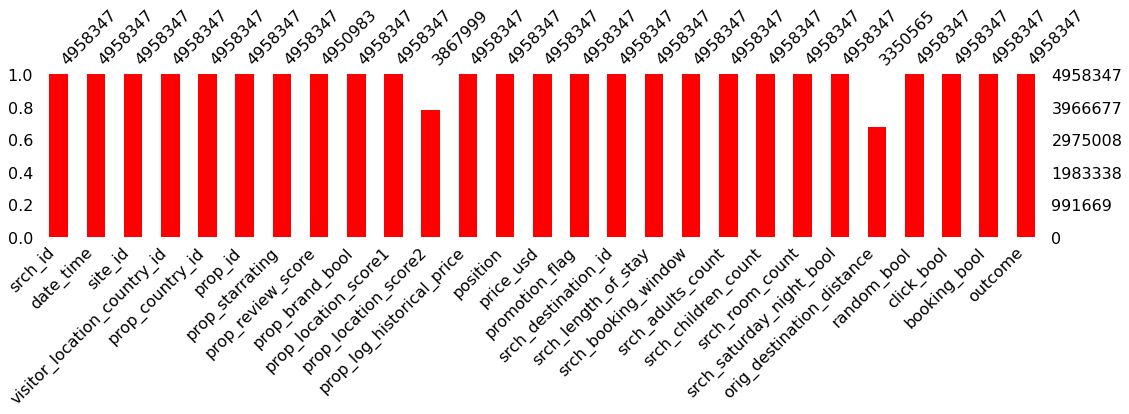

In [12]:
msn.bar(train_reduced,figsize=(18,3), color='red')

<AxesSubplot:>

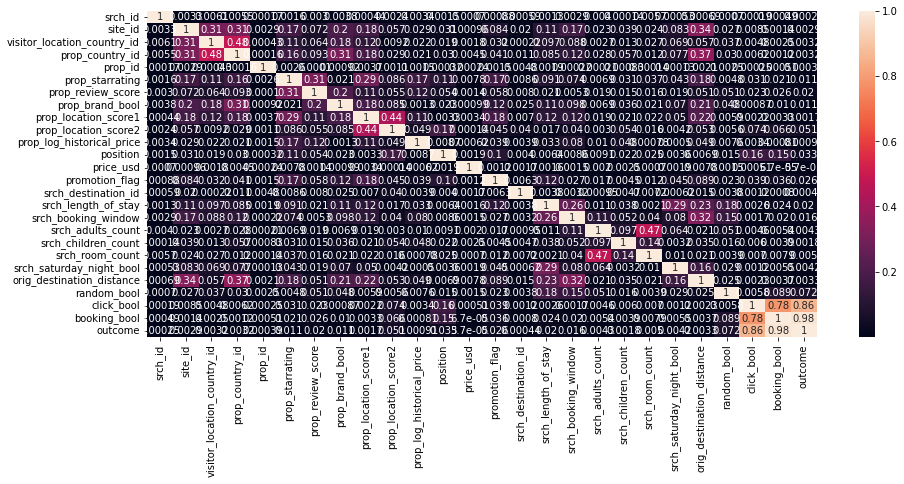

In [13]:
plt.figure(figsize=(15, 6))
sns.heatmap(train_reduced.corr().abs(),  annot=True)

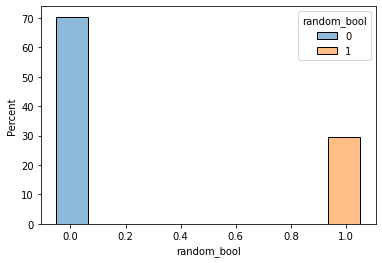

In [14]:
#ax = sns.histplot(x = train_reduced['random_bool'], hue=train_reduced['random_bool'], multiple="dodge", 
#train_reduced = train_reduced.reset_index()
ax = sns.histplot(x = train_reduced['random_bool'], hue=train_reduced['random_bool'] ,
                  stat = 'percent', shrink =10, common_norm=True)

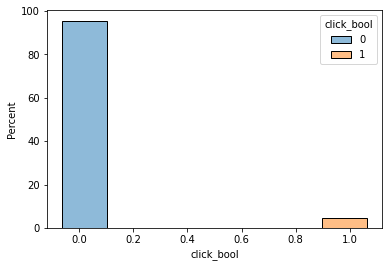

In [15]:
#ax = sns.histplot(x = train_reduced['random_bool'], hue=train_reduced['random_bool'], multiple="dodge", 
#train_reduced = train_reduced.reset_index()
ax = sns.histplot(x = train_reduced['click_bool'], hue=train_reduced['click_bool'] ,
                  stat = 'percent', shrink =4,common_norm=True)

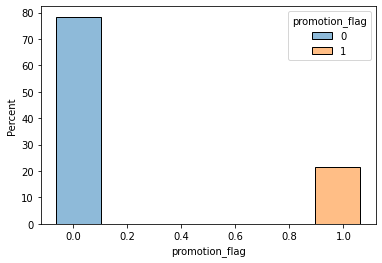

In [16]:
#ax = sns.histplot(x = train_reduced['random_bool'], hue=train_reduced['random_bool'], multiple="dodge", 
#train_reduced = train_reduced.reset_index()
ax = sns.histplot(x = train_reduced['promotion_flag'], hue=train_reduced['promotion_flag'] ,
                  stat = 'percent', shrink =4,common_norm=True)

In [17]:
# train_reduced['bought_flag'] = np.where(train_reduced['gross_bookings_usd']> 0, 1, 0)

# ax = sns.histplot(x = train_reduced['bought_flag'], hue=train_reduced['bought_flag'] ,
#                   stat = 'percent', shrink =4,common_norm=True)


KeyError: 'gross_bookings_usd'

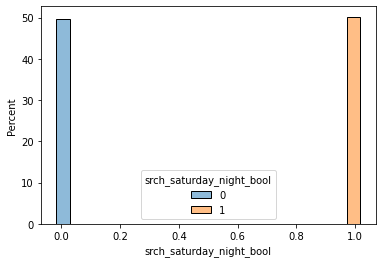

In [18]:


ax = sns.histplot(x = train_reduced['srch_saturday_night_bool'], hue=train_reduced['srch_saturday_night_bool'] ,
                  stat = 'percent', shrink =4,common_norm=True)


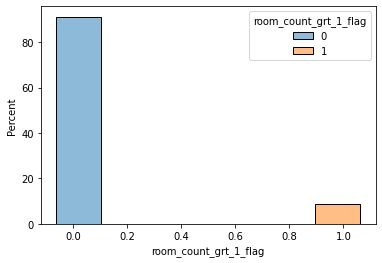

In [19]:
train_reduced['room_count_grt_1_flag'] = np.where(train_reduced['srch_room_count']> 1, 1, 0)

ax = sns.histplot(x = train_reduced['room_count_grt_1_flag'], hue=train_reduced['room_count_grt_1_flag'] ,
                  stat = 'percent', shrink =4,common_norm=True)

In [20]:
# df = train_reduced.loc[(train_reduced['gross_bookings_usd'] >= 0) & (train_reduced['gross_bookings_usd'] <= 1000)]
# sns.kdeplot(df['gross_bookings_usd'])
# plt.show()

KeyError: 'gross_bookings_usd'

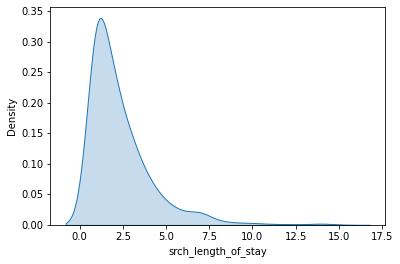

In [21]:
df = train_reduced.loc[(train_reduced['srch_length_of_stay'] >= 0) & (train_reduced['srch_length_of_stay'] <= 15)]
sns.kdeplot(df['srch_length_of_stay'], shade=True, bw_adjust=7)
plt.show()

In [24]:
train_reduced = train_reduced.loc[(train_reduced['random_bool'] == 0)]

In [25]:
train_reduced.head(50)

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool,outcome,room_count_grt_1_flag
60,6,2013-06-05 12:27:51,14,100,100,10759,0,2.0,0,1.95,...,2,0,1,0,652.84,0,0,0,4,0
61,6,2013-06-05 12:27:51,14,100,100,22135,0,5.0,0,1.95,...,2,0,1,0,652.84,0,0,0,6,0
62,6,2013-06-05 12:27:51,14,100,100,52376,2,0.0,1,1.95,...,2,0,1,0,652.85,0,0,0,2,0
63,6,2013-06-05 12:27:51,14,100,100,104251,3,4.0,1,1.95,...,2,0,1,0,652.84,0,1,1,501,0
64,6,2013-06-05 12:27:51,14,100,100,118866,2,4.5,1,1.95,...,2,0,1,0,652.78,0,0,0,3,0
65,8,2013-03-20 17:50:44,5,219,219,10250,3,3.5,1,1.39,...,1,0,1,0,5.40,0,0,0,15,0
66,8,2013-03-20 17:50:44,5,219,219,13252,4,4.5,1,0.00,...,1,0,1,0,3.98,0,0,0,19,0
67,8,2013-03-20 17:50:44,5,219,219,22756,4,4.0,1,2.83,...,1,0,1,0,4.41,0,0,0,10,0
68,8,2013-03-20 17:50:44,5,219,219,27669,3,3.5,1,3.00,...,1,0,1,0,4.17,0,1,1,516,0
69,8,2013-03-20 17:50:44,5,219,219,30630,3,4.0,1,0.00,...,1,0,1,0,3.69,0,0,0,20,0


In [67]:
to_drop = ['srch_id','site_id', 'date_time', 'visitor_location_country_id', 'prop_country_id', 'prop_id', 'prop_brand_bool', 'orig_destination_distance', 'click_bool', 'room_count_grt_1_flag', 'random_bool', 'booking_bool', 'srch_destination_id', 'position', 'prop_location_score2'] 

train1 = train_reduced.drop(to_drop,  axis=1)

<AxesSubplot:>

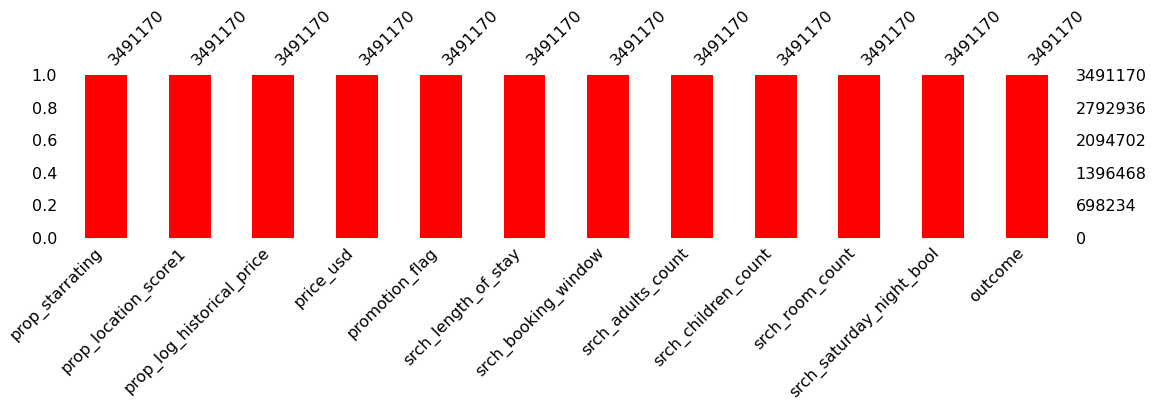

In [68]:
train1=train1.dropna(axis=1,how="any")
msn.bar(train1,figsize=(18,3), color='red')

In [69]:
train1.reset_index()
X = train1.iloc[:, :-1].values
y = train1.iloc[:, -1].values

In [70]:
train1.head(20)

,prop_starrating,prop_location_score1,prop_log_historical_price,price_usd,promotion_flag,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,outcome
60,0,1.95,0.00,97.63,0,1,5,2,0,1,0,4
61,0,1.95,0.00,115.03,0,1,5,2,0,1,0,6
62,2,1.95,0.00,86.03,0,1,5,2,0,1,0,2
63,3,1.95,0.00,145.00,0,1,5,2,0,1,0,501
64,2,1.95,0.00,183.66,0,1,5,2,0,1,0,3
65,3,1.39,4.64,82.00,0,1,0,1,0,1,0,15
66,4,0.00,5.49,160.00,1,1,0,1,0,1,0,19
67,4,2.83,5.11,259.00,0,1,0,1,0,1,0,10
68,3,3.00,4.62,85.00,0,1,0,1,0,1,0,516
69,3,0.00,4.81,109.00,0,1,0,1,0,1,0,20


In [71]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [72]:
print(X_train)

[[3.   1.95 0.   ... 0.   1.   0.  ]
 [3.   0.   4.35 ... 0.   1.   0.  ]
 [2.   1.95 4.34 ... 0.   1.   1.  ]
 ...
 [3.   0.69 4.66 ... 2.   1.   1.  ]
 [3.   0.   5.87 ... 0.   1.   0.  ]
 [2.   3.04 4.56 ... 1.   1.   1.  ]]


In [73]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[36.18 30.  ]
 [40.66 15.  ]
 [35.21 37.  ]
 ...
 [36.4   3.  ]
 [38.65 13.  ]
 [36.01  9.  ]]


In [79]:
print(y_test)

[30 15 37 ...  3 13  9]


In [82]:
result = pd.DataFrame(y_test, columns=['actual'])
predicted= pd.DataFrame(y_pred, columns=['predicted'])

df = pd.DataFrame(X_test)



In [86]:
df['result'] = result
df['perdicted'] = predicted

In [88]:
df.to_csv('results.csv') 